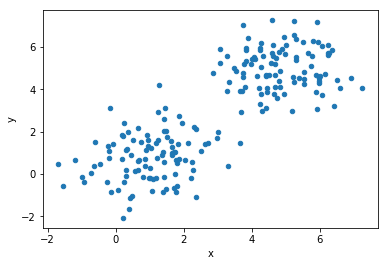

In [38]:
# knn from scratch

# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math  

# define distance calculation funtion
def calculateDistance(x1,y1,x2,y2):  
     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
     return dist  

# make dummy dataset
g1 = np.random.normal(loc=1,scale=1,size=(100,2))
g2 = np.random.normal(loc=1,scale=1,size=(100,2)) + 4
data = np.concatenate((g1, g2))
x = data[:,0]
y = data[:,1]
df = pd.DataFrame(data)
df.columns = ['x','y']
df.plot.scatter(x='x',y='y')
plt.show()

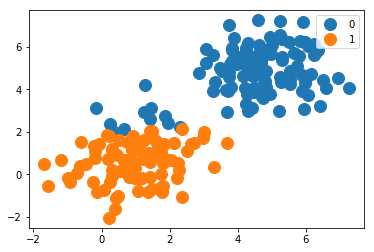

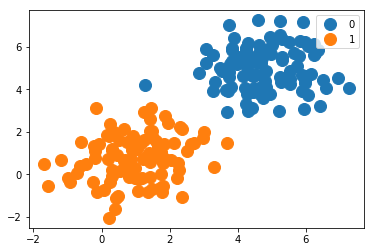

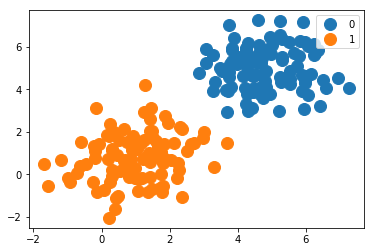

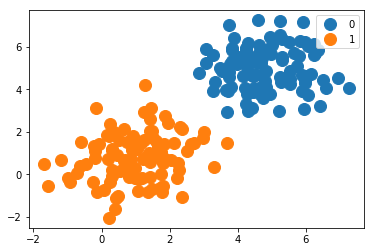

CLUSTERING FINISHED


In [40]:
# initialize starting centroids randomly
dimensions = [x,y]
number_of_centroids = 2

centroid_dictonary = {}
for centroid in np.arange(0,number_of_centroids):
        position_vector = []
        for dimension in dimensions:
            d = data[:,0]
            centroid_position = float(np.random.uniform(low=min(d), high=max(d), size=(1,)))
            position_vector.append(centroid_position)
        centroid_dictonary[centroid] = position_vector

    

list_of_first_centroid_assignments = list(np.full((len(data),), 0))
while True:
    # for each datapoint calculate the distance between each centroid and assign it a closest centroid 
    centroid_assignment_list = []
    for record in data:
        rx = record[0]
        ry = record[1]
        dist_compare_dict = {}
        for centroid in np.arange(0,number_of_centroids):
            cx = centroid_dictonary[centroid][0]
            cy = centroid_dictonary[centroid][1]
            dist = calculateDistance(rx, ry, cx, cy)
            dist_compare_dict[dist] = centroid
        min_dist = min(dist_compare_dict.keys())
        closest_centroid = dist_compare_dict[min_dist]
        centroid_assignment_list.append(closest_centroid)

    df['centroid'] = centroid_assignment_list
    groups = df.groupby('centroid')

    # Plot
    fig, ax = plt.subplots()
    ax.margins(0.05) 
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
    ax.legend()

    plt.show()

    # move the centroid to average of all their points
    dfg = df.groupby('centroid').mean().reset_index()
    new_c_pos = dfg.values.tolist()
    for centroid in np.arange(0,number_of_centroids):
        dfg_c = dfg[dfg['centroid'] == centroid]
        new_c_pos = dfg_c.drop('centroid',axis=1).values.tolist()
        centroid_dictonary[centroid] = new_c_pos[0]
    
    # compare if data points have switched centroid, repeat until no changes
    list_of_next_centroid_assignments = list(df['centroid'])
    if list_of_next_centroid_assignments == list_of_first_centroid_assignments:
        print("CLUSTERING FINISHED")
        break
    else:
        list_of_first_centroid_assignments = list_of_next_centroid_assignments
        continue